# Subgraphs

In [32]:
import pandas as pd
import os
import networkx as nx
import re
import matplotlib.pyplot as plt

# Gets the current directory where the script is located
current_dir = os.getcwd()
print(current_dir)
current_dir = current_dir.replace("src", "dataset")

# Builds full paths to .csv files within the current directory
nodes_path = os.path.join(current_dir, 'nodes.csv')
edges_path = os.path.join(current_dir, 'edges.csv')

# Upload CSV files using paths relative to the current directory, limited to a subset of rows
nodes_df = pd.read_csv(nodes_path)
edges_df = pd.read_csv(edges_path)

# genre that will be considered
#genre = "hip hop"
#genre = "k-pop"
genre = "classical"
#genre = "country"
#genre = "eurovision"


d:\Code_GitHub\Python\LFN\lfn_project\src


In [33]:
# Create Graph
G = nx.Graph()

# Add nodes on the graph
for index, row in nodes_df.iterrows():
    # a node will be added only if it contains the genre
    regexList = re.findall(r'\'(.*?)\'', row['genres'])
    # if it contains the genre
    if ( genre in regexList  ):
        G.add_node(row['spotify_id'], name=row['name'], followers=row['followers'],
               popularity=row['popularity'], genres=row['genres'], chart_hits=row['chart_hits'])


# Add edges on the graph
for index, row in edges_df.iterrows():
    # add the edge only if both nodes are in the graph
    if ( row['id_0'] in G and row['id_1'] in G ):
        G.add_edge(row['id_0'], row['id_1'])


# Print the number of nodes and edges
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")


# Create a dictionary mapping nodes to their 'name' attribute
labels = nx.get_node_attributes(G, 'name')

# print the genre of every node in G
#for node, data in G.nodes(data=True):
#    print(f"Node {node}: Genres = {data.get('genres')}")


Number of nodes: 123
Number of edges: 36


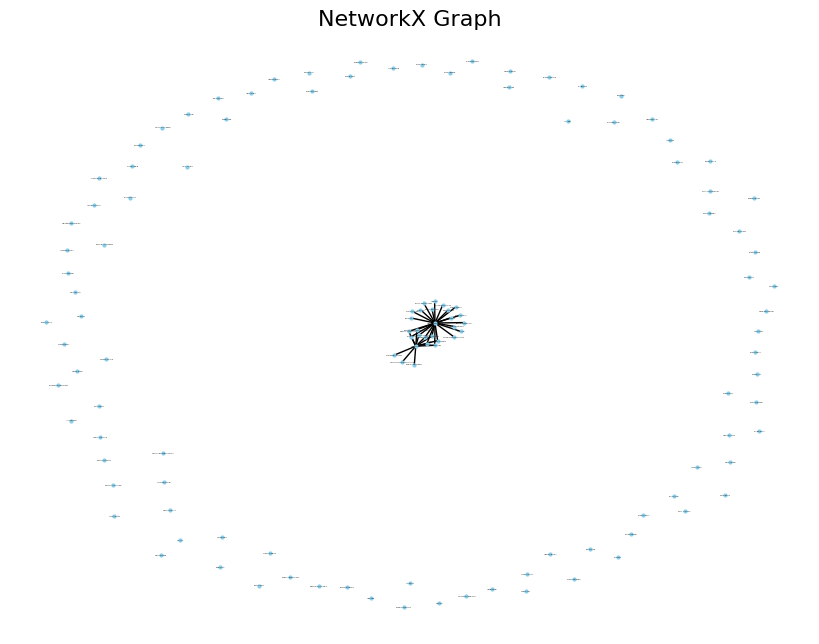

In [34]:
# Plot the graph
plt.figure(figsize=(8, 6))  # Optional: Set figure size
nx.draw(G, labels=labels, with_labels=True, node_color="skyblue", node_size=4, font_size=1)
plt.title("NetworkX Graph", fontsize=16)  # Optional: Add a title
plt.savefig("networkx_graph.pdf", format="pdf")
plt.show()

Printa a schermo solo i nodi con degree non nullo

In [37]:
# Print nodes with degree > 0 and their 'name' attribute
print("Nodes with degree > 0 and their 'name' attribute:")
for node, degree in G.degree():
    if degree > 0:
        # Access 'name' attribute of the node
        name = G.nodes[node].get('name', 'No name attribute')  # Default in case 'name' is missing
        print(f"Name = {name} : degree {degree}")

Nodes with degree > 0 and their 'name' attribute:
Name = Jean Sibelius : degree 12
Name = Johann Sebastian Bach : degree 24
Name = Mstislav Rostropovich : degree 1
Name = Czech Radio Symphony Orchestra : degree 1
Name = Sviatoslav Richter : degree 1
Name = Emerson String Quartet : degree 2
Name = Dietrich Buxtehude : degree 1
Name = George Enescu : degree 1
Name = Herbert von Karajan : degree 2
Name = London Symphony Orchestra : degree 2
Name = Maria João Pires : degree 1
Name = Staatskapelle Dresden : degree 1
Name = Ludwig van Beethoven : degree 1
Name = Franz Liszt : degree 1
Name = Vladimir Ashkenazy : degree 2
Name = Daniel Barenboim : degree 2
Name = Academy of Ancient Music : degree 1
Name = Bavarian Radio Symphony Orchestra : degree 2
Name = Charles Gounod : degree 1
Name = New York Philharmonic : degree 1
Name = Josef Suk : degree 1
Name = Leonard Bernstein : degree 2
Name = Walter Susskind : degree 1
Name = Jordi Savall : degree 1
Name = Chicago Symphony Orchestra : degree 1
